<a href="https://colab.research.google.com/github/sulbhagarg/Deep-Learning/blob/master/DL_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

In [ ]:
!ls

gdrive	sample_data


**DATASET**

In [ ]:
car=[]
path = '/content/gdrive/My Drive/Sem 7/DL/Cars'
for sample in os.listdir(path):
    image = path + '/' + sample;
    car.append(image)

print(car)
print(len(car))

['/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000085.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000163.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000203.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000252.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000346.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000457.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000953.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_000982.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001062.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001208.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001274.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001632.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001830.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_001941.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_002202.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_002368.jpg', '/content/gdrive/My Drive/Sem 7/DL/Cars/2008_002672.jpg', '/content/gdr

In [ ]:
aircraft=[]
path = '/content/gdrive/My Drive/Sem 7/DL/Aircraft'
for sample in os.listdir(path):
    image = path + '/' + sample;
    aircraft.append(image)

print(aircraft)
print(len(aircraft))

['/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_000716.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001227.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001380.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001448.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001468.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001801.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001971.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_001985.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_002358.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_002454.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003275.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003369.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003575.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003655.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003703.jpg', '/content/gdrive/My Drive/Sem 7/DL/Aircraft/2008_003788.jpg', '/conte

**DATASET** **LABELING**

In [ ]:
data=[]
for i in range(len(car)):
  x = car[i]
  y = 0
  data.append([x,y])
for i in range(len(aircraft)):
  x = aircraft[i]
  y = 1
  data.append([x,y])
data = np.array(data)
print(data.shape)

(100, 2)


In [ ]:
random.shuffle(data)

**SPLIT THE DATA**

In [ ]:
seperation = int(data.shape[0]*0.8)
train_data = data[:seperation]
test_data = data[seperation:]
print(train_data.shape)
print(test_data.shape)

(80, 2)
(20, 2)


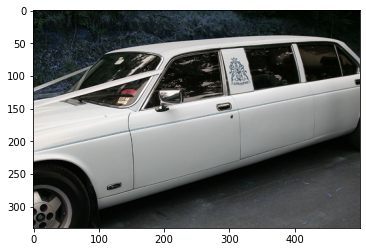

In [ ]:
img = cv2.imread(car_images[1])
plt.imshow(img)

In [ ]:
def data_gen(X, batch_size=8):
  while True:
    images = []
    labels = []
    idx=X.shape[0]

    for i in range(idx):
      label = X[i][1]
      img_path = X[i][0]
      img = cv2.imread(img_path)
      img = cv2.resize(img, (224, 224))
      images.append(img)
      labels.append(int(label))
    
    images = np.array(images)
    labels = np.array(labels)
    yield images, labels

In [ ]:
class Classifier(tf.keras.Model):
  def __init__(self, Batch_Size=1, Image_Shape=((224, 224, 3))):
    super(Classifier, self).__init__()
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(1024, activation='relu')
    self.dense2 = tf.keras.layers.Dense(2, activation='softmax')

  def call(self, sample):
    x = self.flatten(sample)
    x = self.dense1(x)
    x = self.dense2(x)

    return x

In [ ]:
Batch_Size = 8
Image_Shape = (224, 224, 3)

In [ ]:
model = Classifier(Batch_Size, Image_Shape)
model.build(input_shape=(None,  Image_Shape[0], Image_Shape[1], Image_Shape[2]))
model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  154141696 
_________________________________________________________________
dense_1 (Dense)              multiple                  2050      
Total params: 154,143,746
Trainable params: 154,143,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    data_gen(train_data),
    epochs = 10,
    steps_per_epoch = 10,
    validation_data = data_gen(test_data),
    validation_steps = 3,
)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 4058.6785 - accuracy: 0.7629 - val_loss: 17853.6094 - val_accuracy: 0.5200
Epoch 2/10
10/10 [==============================] - 9s 896ms/step - loss: 1935.4729 - accuracy: 0.9381 - val_loss: 9390.1279 - val_accuracy: 0.5200
Epoch 3/10
10/10 [==============================] - 9s 900ms/step - loss: 389.9667 - accuracy: 0.9392 - val_loss: 3.7076 - val_accuracy: 0.7600
Epoch 4/10
10/10 [==============================] - 9s 901ms/step - loss: 3.5359 - accuracy: 0.8216 - val_loss: 32.7652 - val_accuracy: 0.5200
Epoch 5/10
10/10 [==============================] - 9s 903ms/step - loss: 1.7075 - accuracy: 0.8948 - val_loss: 0.7535 - val_accuracy: 0.7200
Epoch 6/10
10/10 [==============================] - 9s 909ms/step - loss: 0.5033 - accuracy: 0.7567 - val_loss: 5.5679 - val_accuracy: 0.5200
Epoch 7/10
10/10 [==============================] - 9s 909ms/step - loss: 0.2321 - accuracy: 0.9381 - val_loss: 0.6609 - val_accuracy: